In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("survey lung cancer.csv")

# Display the first few rows of the dataset
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Contoh dataset
from sklearn.preprocessing import StandardScaler

# 1. Load dan siapkan data
data = load_iris()
X = data.data
y = data.target

# 2. Normalisasi fitur (opsional tapi disarankan untuk SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 5. Prediksi dan evaluasi
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

# 6. Cetak hasil
print("=== HASIL EVALUASI MODEL SVM ===")
print(f"Akurasi: {svm_accuracy:.2%}\n")
print("=== Laporan Klasifikasi ===")
print(svm_report)


=== HASIL EVALUASI MODEL SVM ===
Akurasi: 96.67%

=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



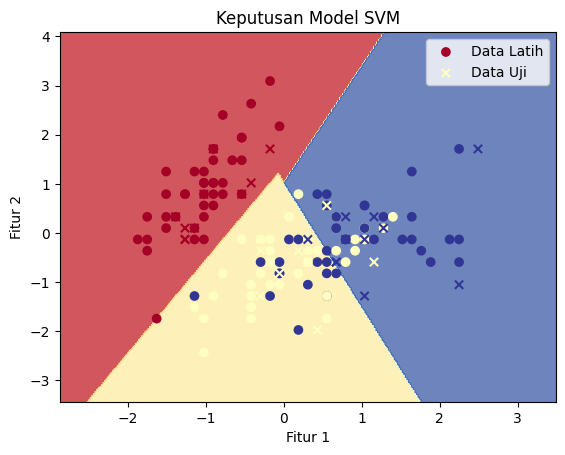

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 1. Load data iris
data = load_iris()
X = data.data[:, :2]  # Ambil dua fitur pertama untuk visualisasi 2D
y = data.target

# 2. Normalisasi fitur (supaya lebih baik dengan SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Latih model SVM dengan kernel linear
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 5. Visualisasi keputusan (decision boundary)
# Membuat grid untuk visualisasi
h = 0.02  # Ukuran grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi pada setiap titik grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.RdYlBu)

# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='o', label="Data Latih")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', label="Data Uji")

# Label dan title
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Keputusan Model SVM')
plt.legend()
plt.show()


In [7]:
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 1. Load data iris
data = load_iris()
X = data.data[:, :2]  # Ambil dua fitur pertama untuk visualisasi 2D
y = data.target

# 2. Normalisasi fitur (supaya lebih baik dengan SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Latih model SVM dengan kernel linear
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 5. Simpan model SVM ke file .pkl
joblib.dump(svm_model, 'svm_model.pkl')

print("Model SVM telah disimpan ke file 'svm_model.pkl'")


Model SVM telah disimpan ke file 'svm_model.pkl'
